<a href="https://colab.research.google.com/github/nashwaput/NashwaMiniProject/blob/main/MiniProject%20Andat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [74]:
!gdown --id 13ihYzzEkooI9F0GOECZyQNNKoWnuA6Sc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13ihYzzEkooI9F0GOECZyQNNKoWnuA6Sc
To: /content/Monthly_Transportation_Statistics.csv
100% 492k/492k [00:00<00:00, 139MB/s]


In [75]:
import pandas as pd
dataset = pd.read_csv('Monthly_Transportation_Statistics.csv')
dataset

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,12/01/2022 12:00:00 AM,22.0,NaN,NaN,NaN,NaN,NaN,11945541.0,246113311.0,...,501000.0,NaN,10563000.0,NaN,2811000.0,NaN,1.216679e+11,6.097504e+10,NaN,6.069286e+10
912,912,01/01/2023 12:00:00 AM,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,503000.0,NaN,12671000.0,NaN,3205000.0,NaN,NaN,NaN,NaN,NaN
913,913,02/01/2023 12:00:00 AM,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,516000.0,NaN,11943000.0,NaN,2953000.0,NaN,NaN,NaN,NaN,NaN
914,914,03/01/2023 12:00:00 AM,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Exploratory Data

In [76]:
dataset.shape

(916, 136)

In [77]:
dataset.columns

Index(['Index', 'Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-time performance (percent)',
       'Transb

In [78]:
dataset.dtypes

Index                                                          int64
Date                                                          object
Air Safety - General Aviation Fatalities                     float64
Highway Fatalities Per 100 Million Vehicle Miles Traveled    float64
Highway Fatalities                                           float64
                                                              ...   
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    float64
Transborder - Total North American Freight                   float64
Transborder - U.S. - Mexico Freight                          float64
U.S. marketing air carriers on-time performance (percent)    float64
Transborder - U.S. - Canada Freight                          float64
Length: 136, dtype: object

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Columns: 136 entries, Index to Transborder - U.S. - Canada Freight
dtypes: float64(134), int64(1), object(1)
memory usage: 973.4+ KB


In [80]:
dataset.nunique()

Index                                                        916
Date                                                         916
Air Safety - General Aviation Fatalities                     139
Highway Fatalities Per 100 Million Vehicle Miles Traveled     32
Highway Fatalities                                            54
                                                            ... 
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted     66
Transborder - Total North American Freight                   203
Transborder - U.S. - Mexico Freight                          203
U.S. marketing air carriers on-time performance (percent)      4
Transborder - U.S. - Canada Freight                          203
Length: 136, dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [81]:
dataset.isnull().sum()

Index                                                          0
Date                                                           0
Air Safety - General Aviation Fatalities                     415
Highway Fatalities Per 100 Million Vehicle Miles Traveled    856
Highway Fatalities                                           861
                                                            ... 
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    849
Transborder - Total North American Freight                   713
Transborder - U.S. - Mexico Freight                          713
U.S. marketing air carriers on-time performance (percent)    857
Transborder - U.S. - Canada Freight                          713
Length: 136, dtype: int64

In [83]:
dataset['Air Safety - General Aviation Fatalities'].dtypes

dtype('float64')

In [84]:
dataset['Highway Fatalities Per 100 Million Vehicle Miles Traveled'].dtypes

dtype('float64')

In [85]:
dataset['Highway Fatalities'].dtypes

dtype('float64')

In [86]:
dataset['U.S. Airline Traffic - Domestic - Non Seasonally Adjusted'].dtypes

dtype('float64')

In [87]:
dataset['Transborder - Total North American Freight'].dtypes

dtype('float64')

In [88]:
dataset['Transborder - U.S. - Mexico Freight'].dtypes

dtype('float64')

In [89]:
dataset['U.S. marketing air carriers on-time performance (percent)'].dtypes

dtype('float64')

In [90]:
dataset['Transborder - U.S. - Canada Freight'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

In [92]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [95]:
imputer = imputer.fit(dataset[['Air Safety - General Aviation Fatalities', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled', 'Highway Fatalities', 'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted', 'Transborder - Total North American Freight', 'Transborder - U.S. - Mexico Freight', 'U.S. marketing air carriers on-time performance (percent)', 'Transborder - U.S. - Canada Freight']])
imputer

SimpleImputer()

In [99]:
dataset[['Air Safety - General Aviation Fatalities', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled', 'Highway Fatalities', 'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted', 'Transborder - Total North American Freight', 'Transborder - U.S. - Mexico Freight', 'U.S. marketing air carriers on-time performance (percent)', 'Transborder - U.S. - Canada Freight']] = imputer.transform(dataset[['Air Safety - General Aviation Fatalities', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled', 'Highway Fatalities', 'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted', 'Transborder - Total North American Freight', 'Transborder - U.S. - Mexico Freight', 'U.S. marketing air carriers on-time performance (percent)', 'Transborder - U.S. - Canada Freight']])
dataset.isnull().sum()

Index                                                        0
Date                                                         0
Air Safety - General Aviation Fatalities                     0
Highway Fatalities Per 100 Million Vehicle Miles Traveled    0
Highway Fatalities                                           0
                                                            ..
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    0
Transborder - Total North American Freight                   0
Transborder - U.S. - Mexico Freight                          0
U.S. marketing air carriers on-time performance (percent)    0
Transborder - U.S. - Canada Freight                          0
Length: 136, dtype: int64

Using drop column tohandle missing value on categorical or object data

In [100]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Index                                                        0
Date                                                         0
Air Safety - General Aviation Fatalities                     0
Highway Fatalities Per 100 Million Vehicle Miles Traveled    0
Highway Fatalities                                           0
U.S. Airline Traffic - Domestic - Non Seasonally Adjusted    0
Transborder - Total North American Freight                   0
Transborder - U.S. - Mexico Freight                          0
U.S. marketing air carriers on-time performance (percent)    0
Transborder - U.S. - Canada Freight                          0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [101]:
dataset = dataset.drop('Date', axis=1)
dataset

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
1,1,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
2,2,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
3,3,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
4,4,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
...,...,...,...,...,...,...,...,...,...
911,911,22.000000,1.182667,8914.490909,5.521582e+07,1.216679e+11,6.097504e+10,0.801695,6.069286e+10
912,912,20.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
913,913,12.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
914,914,15.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [102]:
dataset.describe()

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
count,916.000000,916.000000,916.000000,916.000000,9.160000e+02,9.160000e+02,9.160000e+02,916.000000,9.160000e+02
mean,457.500000,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
std,264.570721,33.688870,0.030150,258.458663,4.662559e+06,7.950785e+09,5.050378e+09,0.016524,3.362457e+09
min,0.000000,0.000000,0.980000,6726.000000,2.880000e+06,5.426452e+10,2.164871e+10,0.600000,2.976629e+10
25%,228.750000,49.750000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
50%,457.500000,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
75%,686.250000,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,0.801695,4.929506e+10
max,915.000000,345.000000,1.440000,11750.000000,7.528000e+07,1.418502e+11,7.029840e+10,0.900000,7.334734e+10


<Axes: >

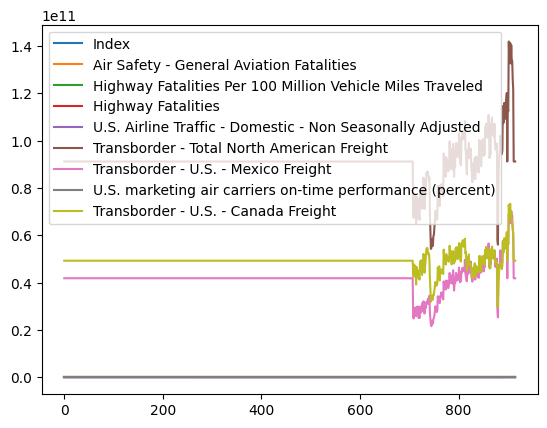

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

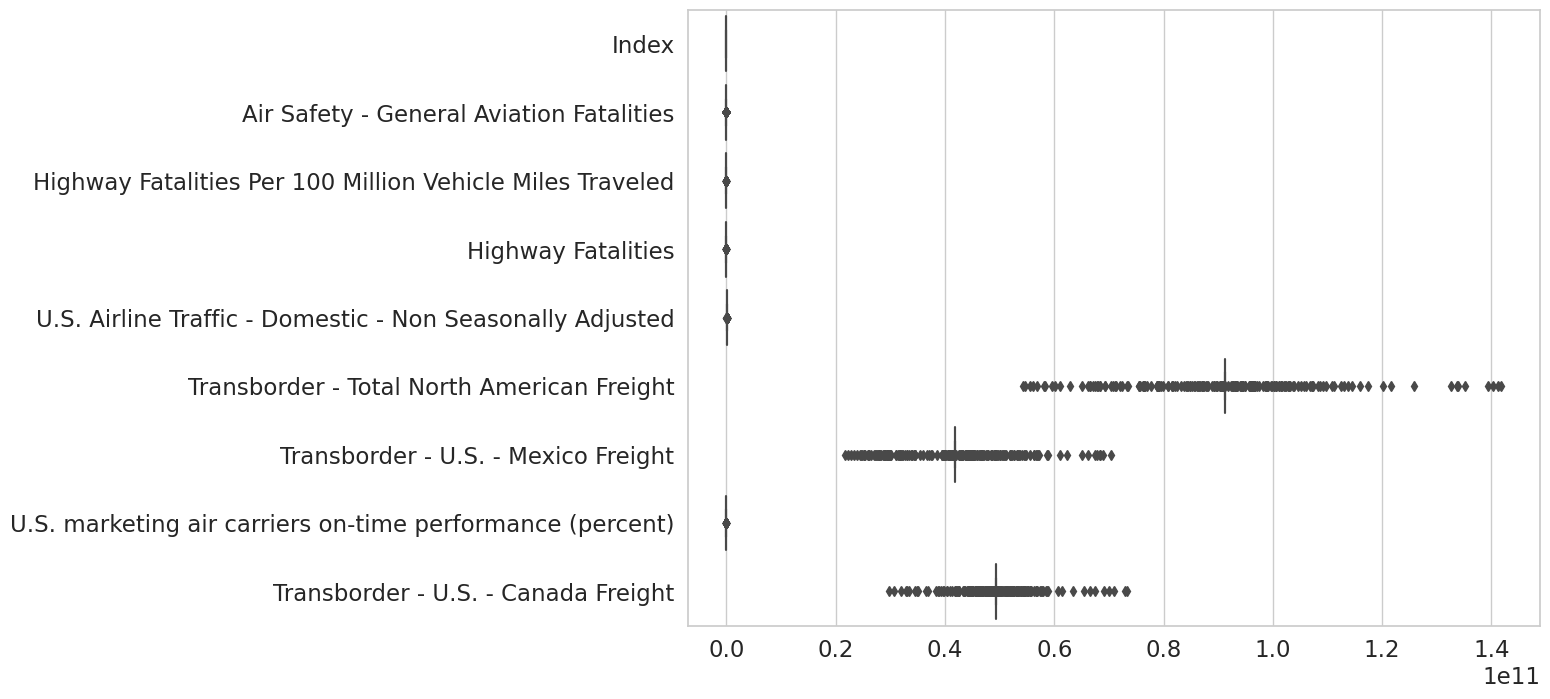

In [104]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

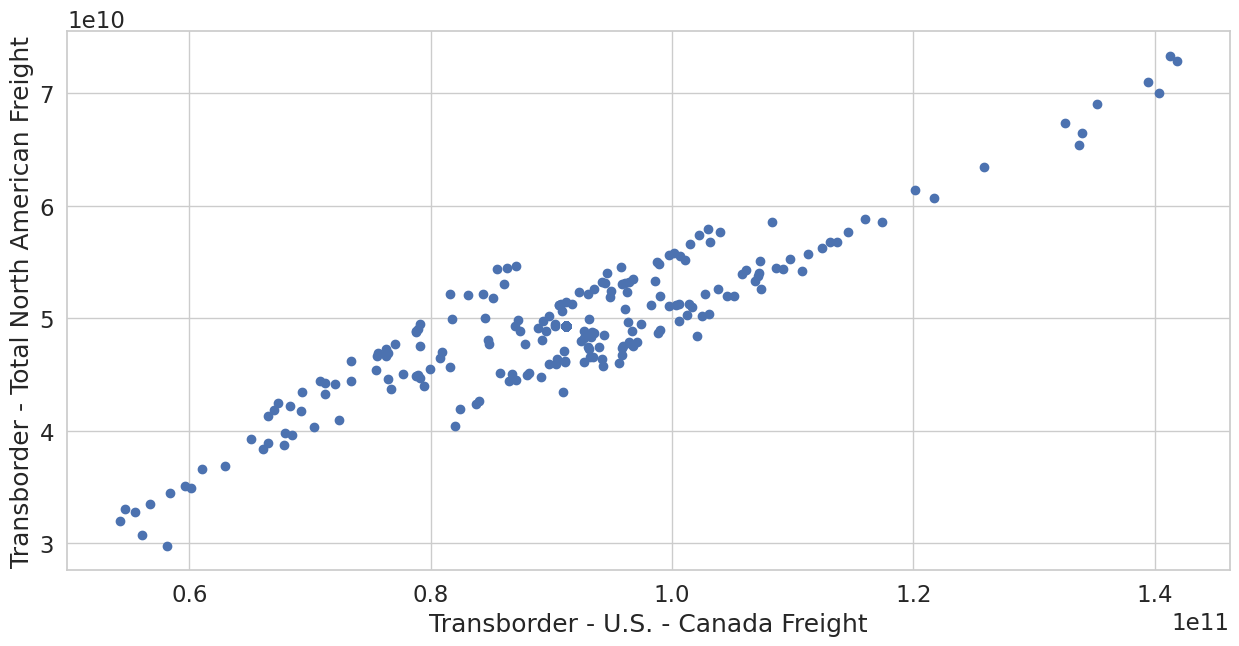

In [105]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Transborder - Total North American Freight'], dataset['Transborder - U.S. - Canada Freight'])
 
# x-axis label
ax.set_xlabel('Transborder - U.S. - Canada Freight')
 
# y-axis label
ax.set_ylabel('Transborder - Total North American Freight')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [106]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Transborder - Total North American Freight'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Transborder - Total North American Freight'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (916, 9)


In [107]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Transborder - Total North American Freight'] > upper].index
outliers_lower = dataset[dataset['Transborder - Total North American Freight'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (713, 9)


In [108]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Transborder - U.S. - Canada Freight'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Transborder - U.S. - Canada Freight'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (713, 9)


In [109]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Transborder - U.S. - Canada Freight'] > upper].index
outliers_lower = dataset[dataset['Transborder - U.S. - Canada Freight'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (713, 9)


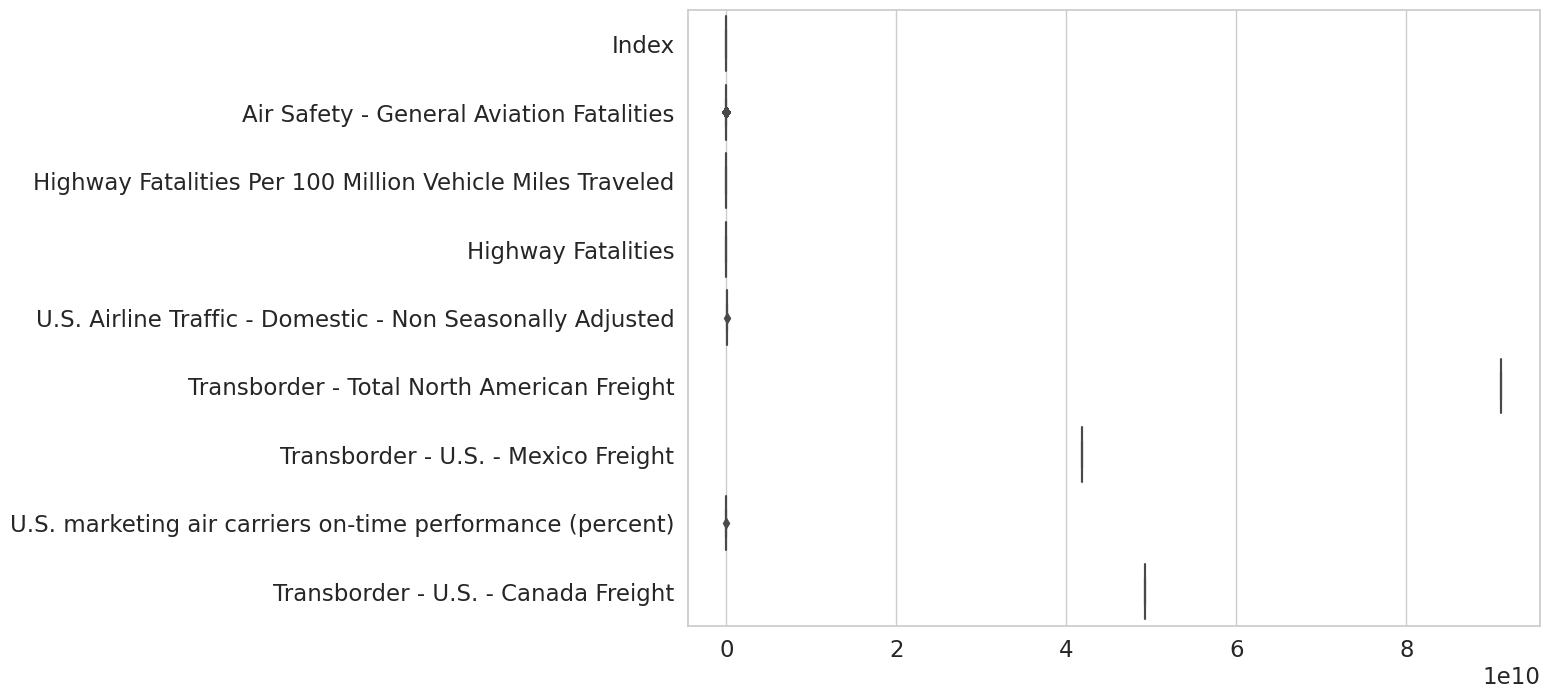

In [110]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

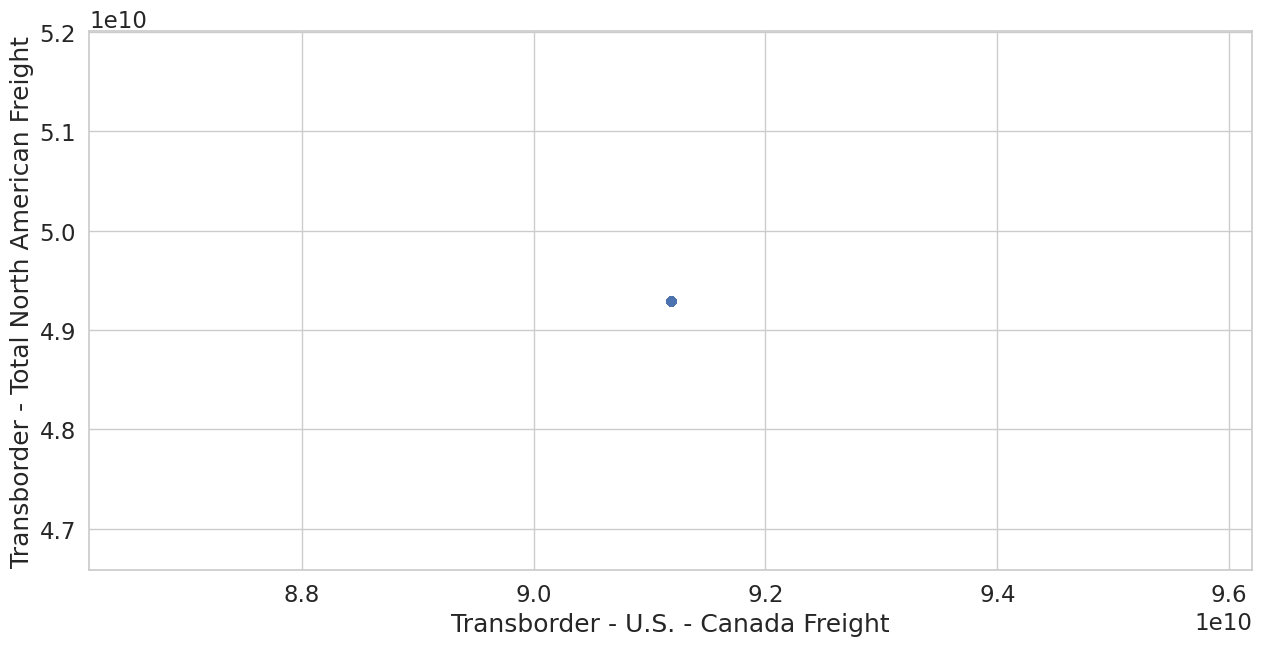

In [111]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Transborder - Total North American Freight'], dataset['Transborder - U.S. - Canada Freight'])
 
# x-axis label
ax.set_xlabel('Transborder - U.S. - Canada Freight')
 
# y-axis label
ax.set_ylabel('Transborder - Total North American Freight')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

LinAlgError: ignored

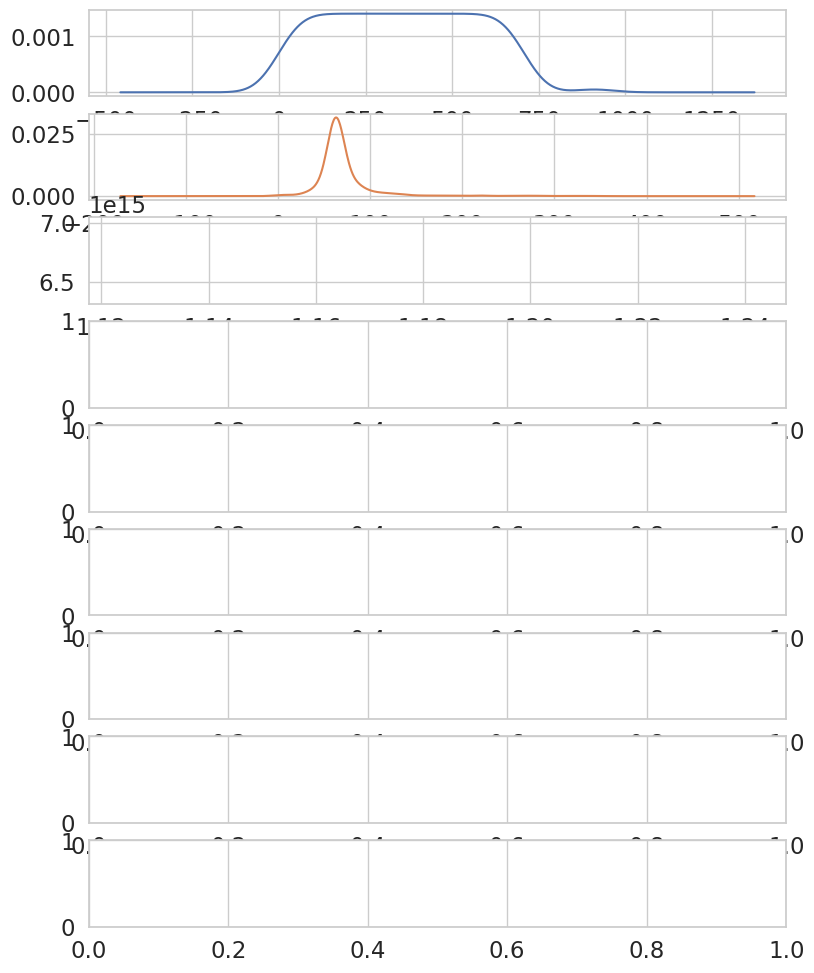

In [114]:
dataset.plot(kind='kde',subplots=True,layout=(15,1),figsize=(9,20), sharex=False)
plt.show()

Show data distribution based on histogram

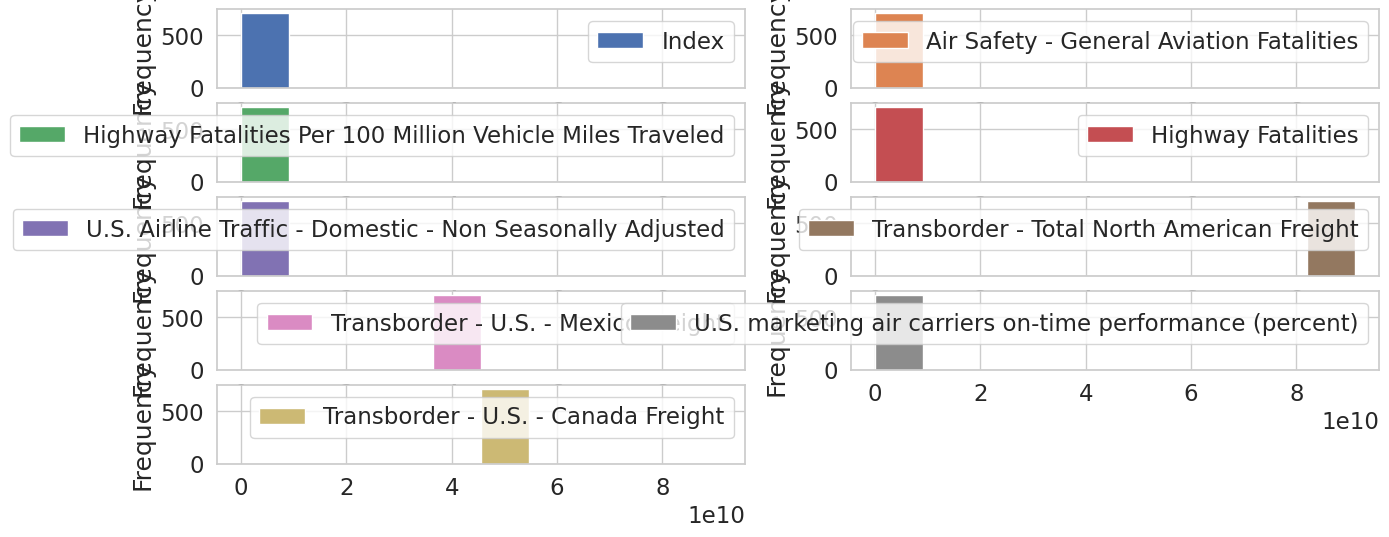

In [115]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

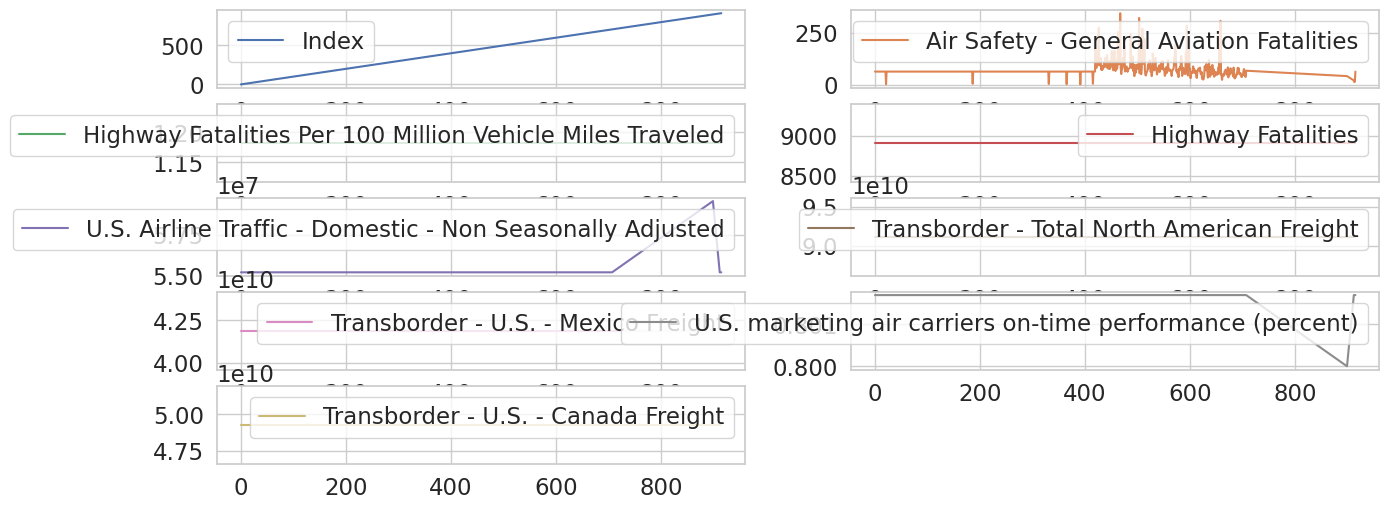

In [116]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


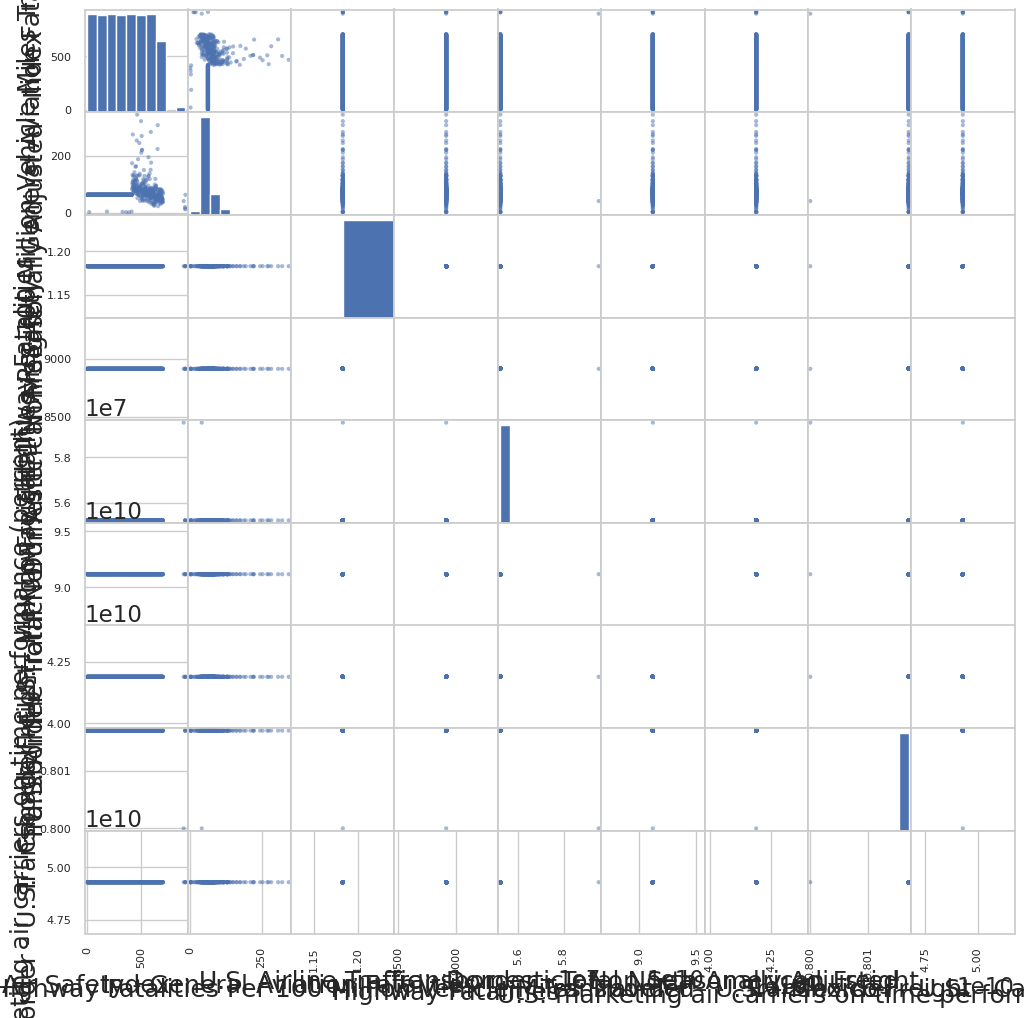

In [117]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

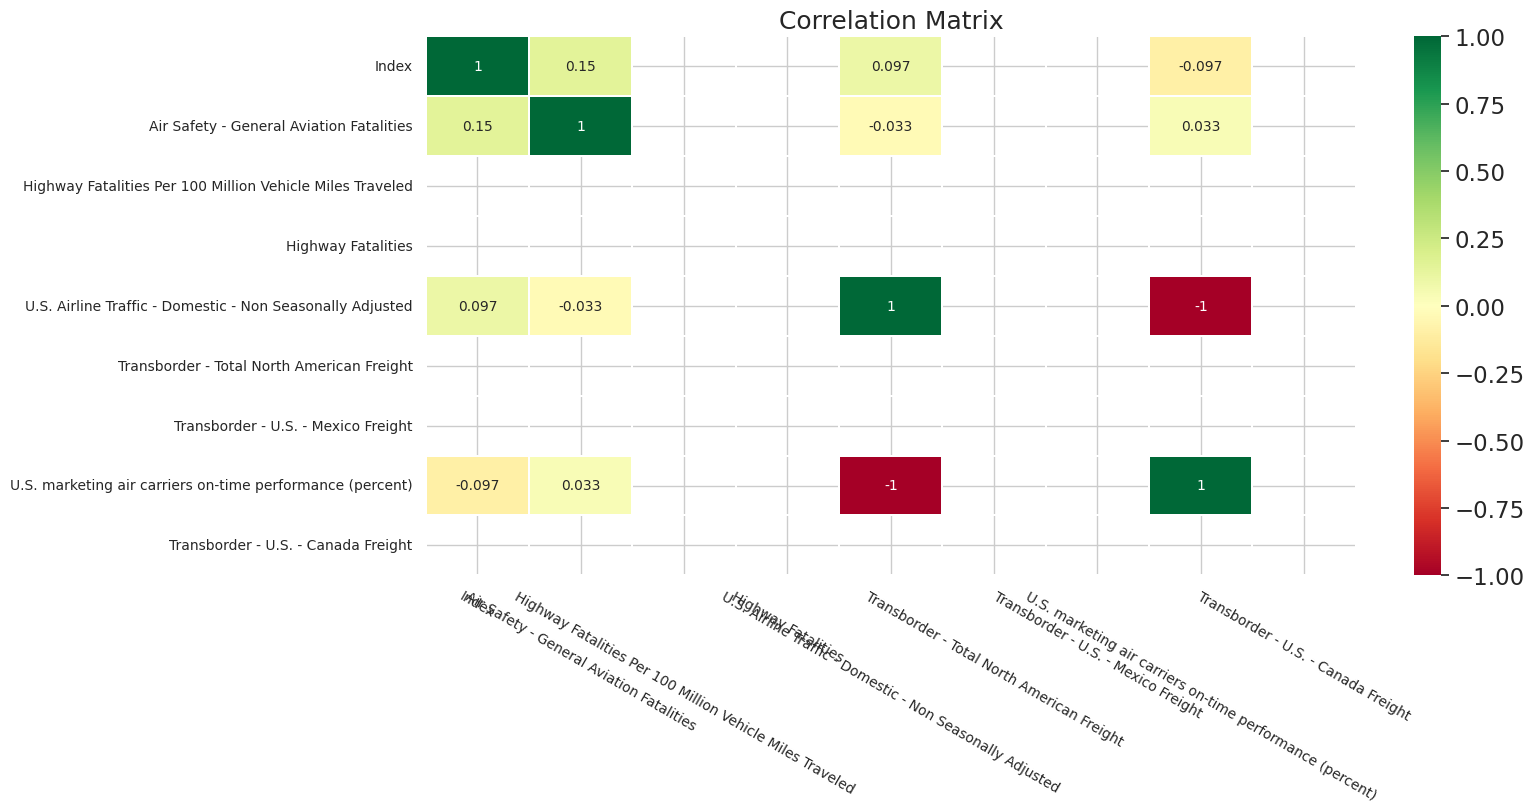

In [118]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [121]:
x = dataset.drop('U.S. marketing air carriers on-time performance (percent)', axis=1)
x

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
0,0,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
1,1,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
2,2,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
3,3,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
4,4,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
...,...,...,...,...,...,...,...,...
899,899,41.000000,1.182667,8914.490909,5.954000e+07,9.118179e+10,4.188672e+10,4.929506e+10
912,912,20.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
913,913,12.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
914,914,15.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10


Choose feature Type as a label

In [122]:
y = dataset["U.S. marketing air carriers on-time performance (percent)"]
y

0      0.801695
1      0.801695
2      0.801695
3      0.801695
4      0.801695
         ...   
899    0.800000
912    0.801695
913    0.801695
914    0.801695
915    0.801695
Name: U.S. marketing air carriers on-time performance (percent), Length: 713, dtype: float64

In [123]:
y.values.reshape(-1,1)

array([[0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.80169492],
       [0.801

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [124]:
x = pd.get_dummies(x)
x

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
0,0,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
1,1,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
2,2,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
3,3,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
4,4,62.800399,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
...,...,...,...,...,...,...,...,...
899,899,41.000000,1.182667,8914.490909,5.954000e+07,9.118179e+10,4.188672e+10,4.929506e+10
912,912,20.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
913,913,12.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
914,914,15.000000,1.182667,8914.490909,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10


In [ ]:
x.shape

(12627, 13041)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [125]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7
0,-1.710875,-0.231042,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
1,-1.706088,-0.231042,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
2,-1.701301,-0.231042,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
3,-1.696514,-0.231042,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
4,-1.691728,-0.231042,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
...,...,...,...,...,...,...,...,...
708,2.592560,-0.890290,2.220446e-16,1.818989e-12,26.683328,0.0,0.0,0.000008
709,2.654790,-1.525335,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
710,2.659577,-1.767256,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008
711,2.664364,-1.676536,2.220446e-16,1.818989e-12,-0.037477,0.0,0.0,0.000008


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [126]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7
0,0.000000,0.179652,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001093,0.179652,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002186,0.179652,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003279,0.179652,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004372,0.179652,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
708,0.982514,0.116279,0.0,0.0,1.0,0.0,0.0,0.0
709,0.996721,0.055233,0.0,0.0,0.0,0.0,0.0,0.0
710,0.997814,0.031977,0.0,0.0,0.0,0.0,0.0,0.0
711,0.998907,0.040698,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [129]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

ValueError: ignored

In [130]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

NameError: ignored

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [131]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [132]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: ignored

In [133]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

NameError: ignored

In [134]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

NameError: ignored

In [135]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

NameError: ignored

In [136]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

NameError: ignored